In [7]:
# Step 4: Load test data again if not already loaded
import pandas as pd
df_test = pd.read_csv("Combined_FakeNews.csv")

# Step 5: Load model and vectorizer
import joblib
model = joblib.load("logistic_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

# Step 6: Transform test data using TF-IDF
X_test_tfidf = tfidf.transform(df_test['text'])

# Step 7: Make predictions
df_test['prediction'] = model.predict(X_test_tfidf)

# Step 8: Save the results to a new CSV file
df_test.to_csv("FakeNews_Predicted.csv", index=False)

print("✅ Prediction complete! File saved as FakeNews_Predicted.csv")


✅ Prediction complete! File saved as FakeNews_Predicted.csv


In [6]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load full dataset
df = pd.read_csv("Combined_FakeNews.csv")

# Drop rows with missing values
df = df.dropna(subset=['text', 'label'])  # Make sure 'label' column exists

# Split data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on full dataset
full_tfidf = tfidf.transform(df['text'])
df['prediction'] = model.predict(full_tfidf)

# Export to CSV
df.to_csv("FakeNews_Predicted.csv", index=False)
print("✅ Predictions saved to 'FakeNews_Predicted.csv'")


✅ Predictions saved to 'FakeNews_Predicted.csv'


In [4]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Step 2: Load test data
df_test = pd.read_csv("Combined_FakeNews.csv")

# Step 3: Load the same TF-IDF vectorizer and model you saved earlier
# Make sure you have these `.pkl` files uploaded
tfidf = joblib.load("tfidf_vectorizer.pkl")      # TF-IDF vectorizer
model = joblib.load("logistic_model.pkl")        # Trained model

# Step


FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_vectorizer.pkl'

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)


NameError: name 'X_train' is not defined

In [2]:
import pandas as pd
# Load your test data
df_test = pd.read_csv('Combined_FakeNews.csv')

# Show first few rows to confirm
df_test.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0

In [7]:
import pandas as pd

fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

fake_df["label"] = 0
real_df["label"] = 1

df = pd.concat([fake_df, real_df], ignore_index=True)
df.to_csv("Combined_FakeNews.csv", index=False)


In [6]:
def predict_news(news_text):
    tfidf_input = vectorizer.transform([news_text])
    prediction = model.predict(tfidf_input)[0]
    return "Real News" if prediction == 1 else "Fake News"

# Try it
sample = "Breaking: Government introduces new policy for startups!"
print("Prediction:", predict_news(sample))


Prediction: Fake News


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9846325167037862

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980


Confusion Matrix:
 [[4658   75]
 [  63 4184]]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Use only the "text" column for prediction
X = df["text"]
y = df["label"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Vectorization complete. TF-IDF matrix shapes:")
print("Train:", X_train_tfidf.shape)
print("Test:", X_test_tfidf.shape)


Vectorization complete. TF-IDF matrix shapes:
Train: (35918, 111111)
Test: (8980, 111111)


Dataset shape: (44898, 5)

Column names: ['title', 'text', 'subject', 'date', 'label']

Missing values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


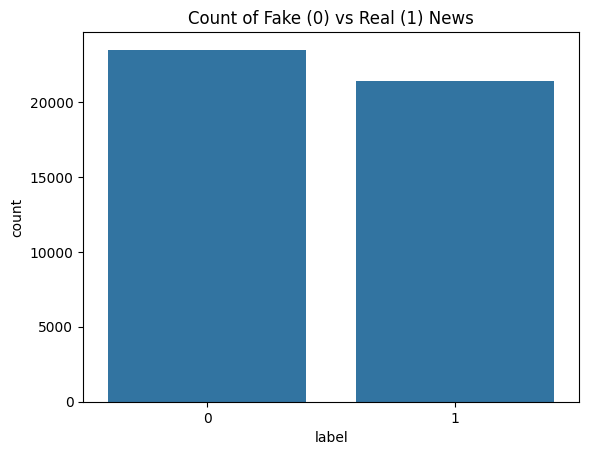


Sample Fake News Text:
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His 

In [3]:
# Basic info
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# Count of real vs fake news
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.title("Count of Fake (0) vs Real (1) News")
plt.show()

# Sample text
print("\nSample Fake News Text:\n", df[df['label'] == 0]['text'].iloc[0])
print("\nSample Real News Text:\n", df[df['label'] == 1]['text'].iloc[0])


In [2]:
import pandas as pd

# Load the datasets
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels to both datasets
fake_df["label"] = 0  # 0 = Fake
real_df["label"] = 1  # 1 = Real

# Combine both datasets
df = pd.concat([fake_df, real_df], ignore_index=True)

# Show first 5 rows
df.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_7.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['date'].value_counts()
    for x_label, grp in _df_8.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('date')

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
